In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress
import datetime
import calendar
import seaborn as sns

from census import Census
from citipy import citipy
from config import api_key

# # Read the mass shootings file and store into Pandas DataFrames
mass_shoot_df = pd.read_csv("Resources/mass_shootings_complete.csv")
mass_shoot_df = mass_shoot_df.dropna()
mass_shoot_df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4
...,...,...,...,...,...,...,...
3763,2201641,1-Jan-22,Wisconsin,Kenosha,1708 52nd St,1,3
3764,2202001,1-Jan-22,Illinois,Peoria,2000 block of SW Adams St,2,2
3765,2201876,1-Jan-22,South Carolina,Dillon,3261 Hwy 9,0,5
3766,2201848,1-Jan-22,Indiana,South Bend,1500 block of S Miami St,0,4


# **Mass Shootings Summary for the last 8 years (Julie)** 


In [2]:
# Count total incidents per State
state_count = mass_shoot_df["State"].value_counts()
state_count

Illinois                391
California              327
Texas                   257
Florida                 220
Pennsylvania            181
New York                176
Louisiana               169
Ohio                    147
Georgia                 140
Maryland                119
Missouri                117
Michigan                117
Tennessee               113
North Carolina          112
Alabama                 102
South Carolina           95
Virginia                 89
New Jersey               87
Indiana                  77
Mississippi              72
District of Columbia     59
Colorado                 58
Wisconsin                51
Minnesota                48
Arizona                  46
Kentucky                 44
Arkansas                 42
Washington               42
Massachusetts            30
Oklahoma                 28
Nevada                   27
Connecticut              27
Kansas                   22
New Mexico               22
Oregon                   20
Delaware            

In [3]:
state_count_df = pd.DataFrame(state_count)
state_count_df

,State
Illinois,391
California,327
Texas,257
Florida,220
Pennsylvania,181
New York,176
Louisiana,169
Ohio,147
Georgia,140
Maryland,119


<BarContainer object of 49 artists>

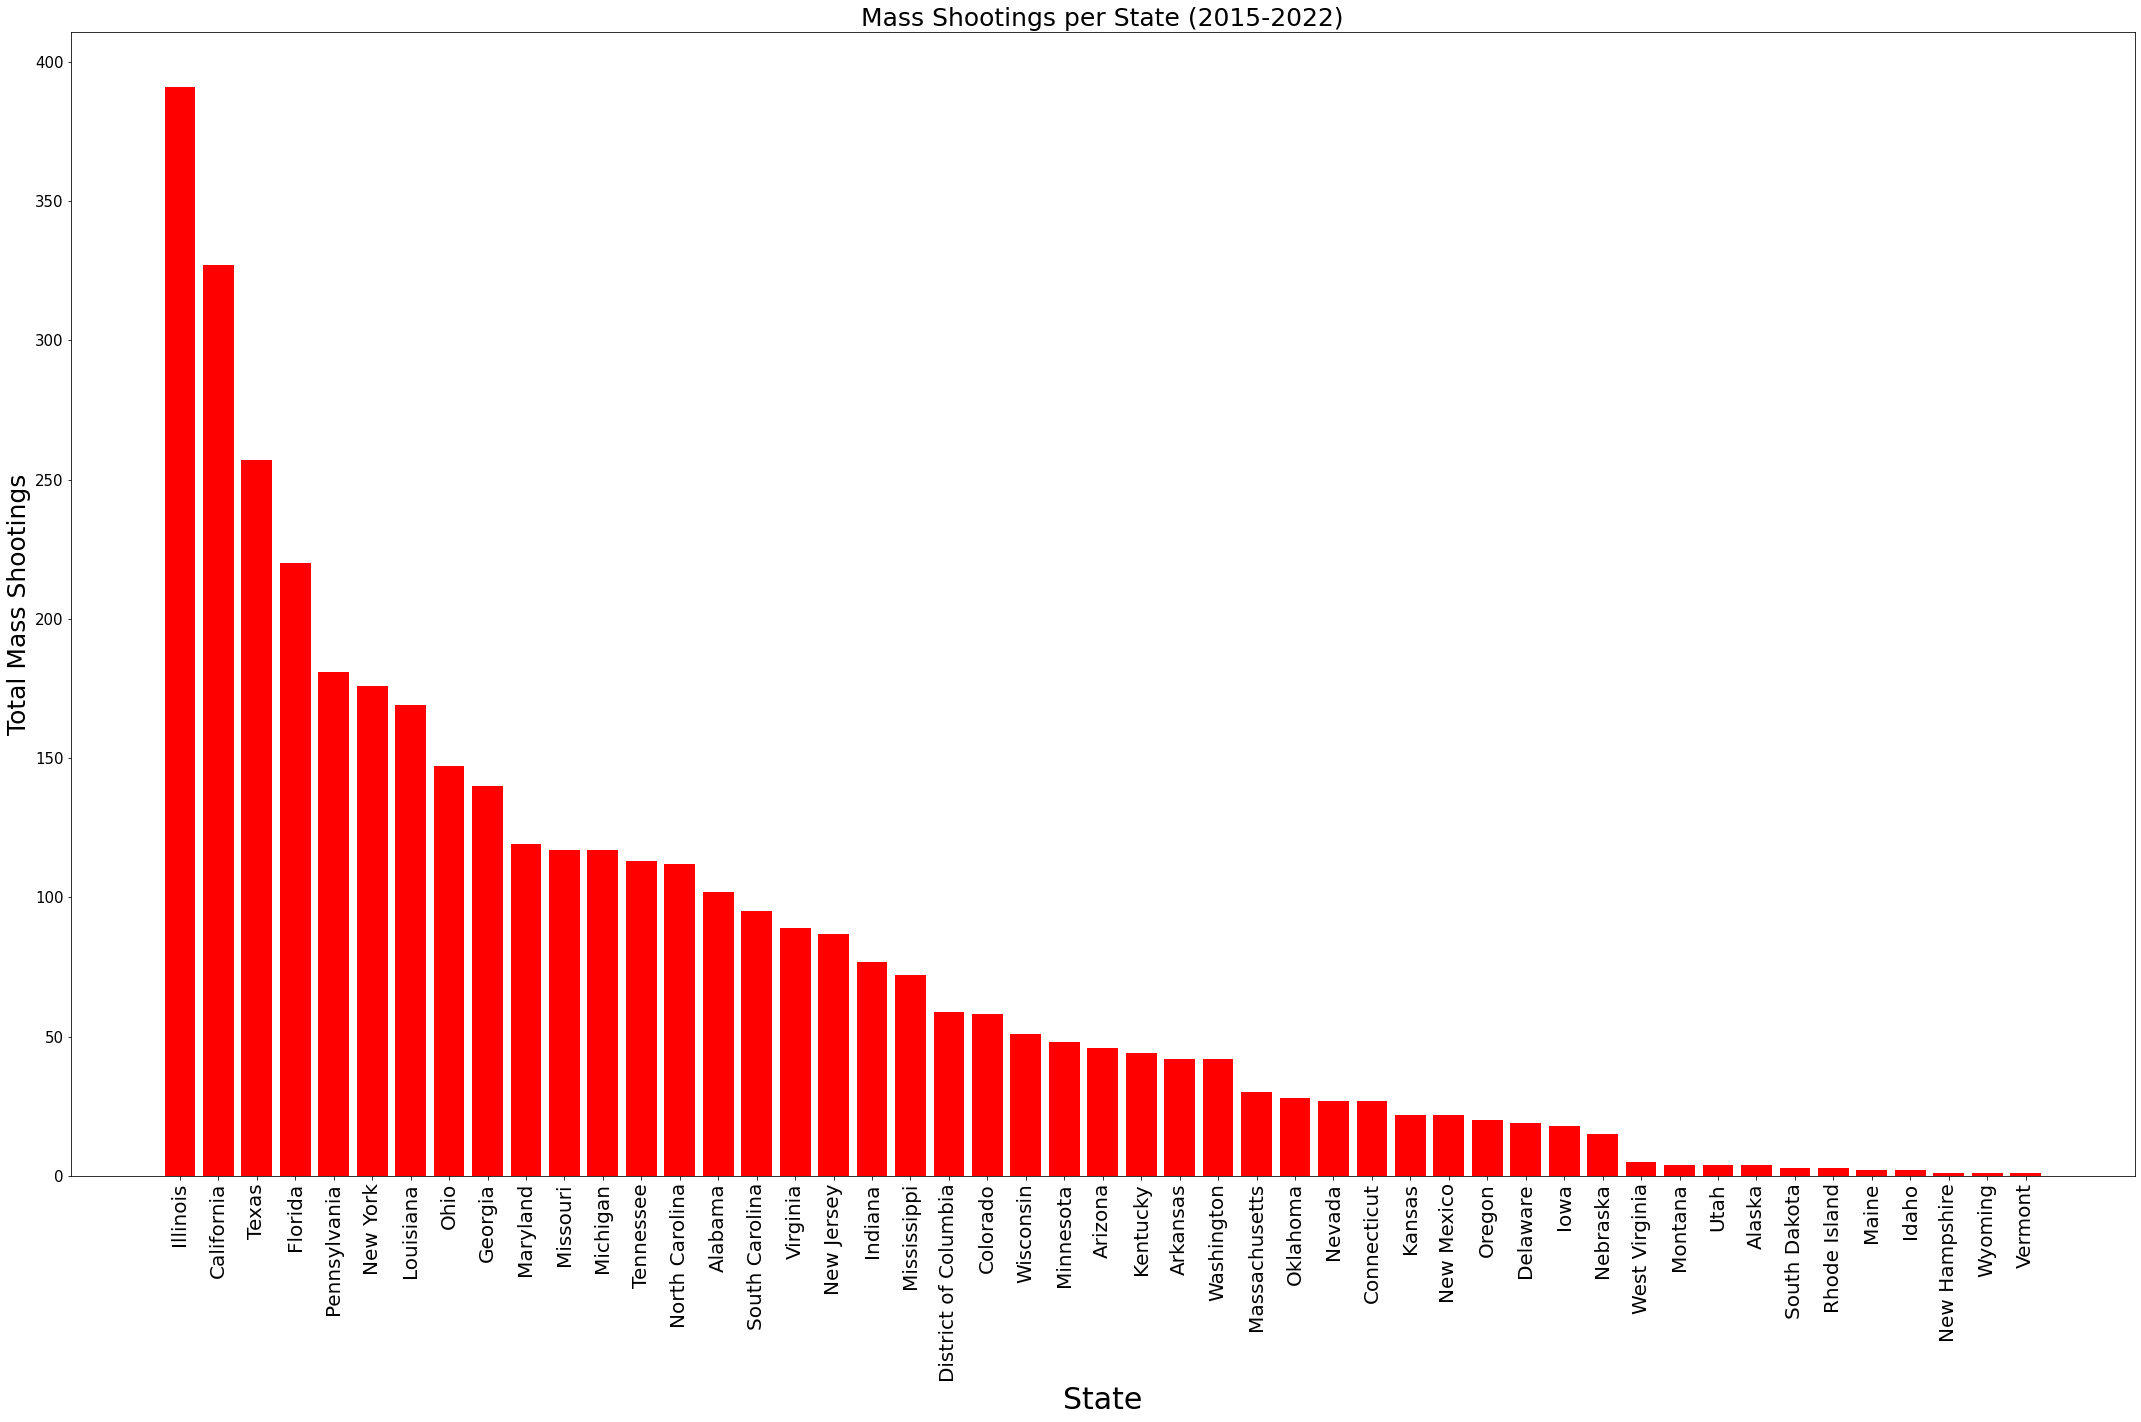

In [65]:
# Create a bar chart with mass shootings per state
fig, ax = plt.subplots(figsize=(30,20))

x_axis = state_count.index.values
y_axis = state_count.values
per_state_chart = ax.bar(x_axis, y_axis, color='red', align="center", width = 0.8)
plt.xlabel("State", fontsize = 30)
plt.ylabel("Total Mass Shootings", fontsize = 25)
plt.title("Mass Shootings per State (2015-2022)", fontsize = 25)
plt.xticks(rotation="vertical", fontsize = 20)

plt.savefig("output_data/total_per_state.png")

per_state_chart

In [5]:
# Calculate how many incidents happened in different cities
mass_shoot_by_city = mass_shoot_df["City Or County"].value_counts()
mass_shoot_by_city_df = pd.DataFrame(mass_shoot_by_city)
mass_shoot_by_city_df

,City Or County
Chicago,289
Philadelphia,128
Baltimore,82
Houston,72
New Orleans,61
...,...
Tracy,1
Manteca,1
Green Sea,1
Newport News,1


In [6]:
# Creating a separate column to store Year
mass_shoot_df["Year"] = pd.to_datetime(mass_shoot_df["Incident Date"]).dt.year
mass_shoot_df.head()

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Year
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4,2015
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4,2015
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4,2015
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4,2015


In [7]:
# Calculate the total number of mass shootings each year 
mass_shootings_2015 = mass_shoot_df[mass_shoot_df["Year"] == 2015]
mass_shootings_2016 = mass_shoot_df[mass_shoot_df["Year"] == 2016]
mass_shootings_2017 = mass_shoot_df[mass_shoot_df["Year"] == 2017]
mass_shootings_2018 = mass_shoot_df[mass_shoot_df["Year"] == 2018]
mass_shootings_2019 = mass_shoot_df[mass_shoot_df["Year"] == 2019]
mass_shootings_2020 = mass_shoot_df[mass_shoot_df["Year"] == 2020]
mass_shootings_2021 = mass_shoot_df[mass_shoot_df["Year"] == 2021]
mass_shootings_2022 = mass_shoot_df[mass_shoot_df["Year"] == 2022]

total_2015 = mass_shootings_2015["Year"].value_counts()
total_2016 = mass_shootings_2016["Year"].value_counts()
print(total_2015)
print(total_2016)

2015    335
Name: Year, dtype: int64
2016    383
Name: Year, dtype: int64


In [8]:
# Create a dataframe to store number of incidents per year
mass_shoot_by_year = mass_shoot_df["Year"].value_counts()
mass_shoot_by_year_df = pd.DataFrame(mass_shoot_by_year)
mass_shoot_by_year_df

,Year
2021,688
2022,641
2020,609
2019,417
2016,383
2017,348
2015,335
2018,335


**Bar chart: Mass Shootings per year**

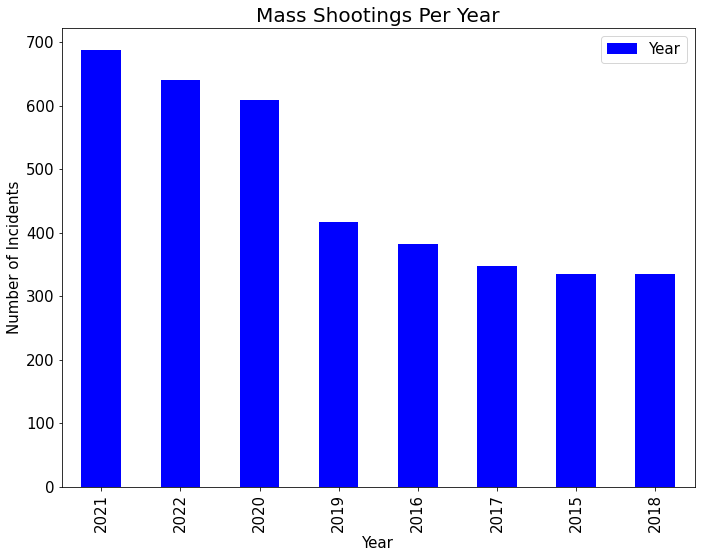

In [66]:
# Create a bar chart to display Total Mass Shootings per year
bar_chart_per_year = mass_shoot_by_year_df.plot(kind="bar", color="blue", figsize =(10,8))
bar_chart_per_year.set_title("Mass Shootings Per Year", fontsize = 20)
bar_chart_per_year.set_xlabel("Year", fontsize = 15)
bar_chart_per_year.set_ylabel("Number of Incidents", fontsize = 15)

plt.savefig("output_data/total_per_year.png")

bar_chart_per_year

**Bar chart: mass shootings per season** 

In [10]:
mass_shoot_df["Month"] = pd.to_datetime(mass_shoot_df["Incident Date"]).dt.month
mass_shoot_df["Month"] = mass_shoot_df["Month"].apply(lambda x: calendar.month_name[x])
mass_shoot_df

,Incident ID,Incident Date,State,City Or County,Address,# Killed,# Injured,Year,Month
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015,December
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4,2015,December
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4,2015,December
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4,2015,December
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4,2015,December
...,...,...,...,...,...,...,...,...,...
3763,2201641,1-Jan-22,Wisconsin,Kenosha,1708 52nd St,1,3,2022,January
3764,2202001,1-Jan-22,Illinois,Peoria,2000 block of SW Adams St,2,2,2022,January
3765,2201876,1-Jan-22,South Carolina,Dillon,3261 Hwy 9,0,5,2022,January
3766,2201848,1-Jan-22,Indiana,South Bend,1500 block of S Miami St,0,4,2022,January


In [11]:
per_month = mass_shoot_df["Month"].value_counts()
per_month_df = pd.DataFrame(per_month)
per_month_df

,Month
July,479
June,453
August,390
May,357
September,357
October,326
November,281
April,281
March,215
December,213


<BarContainer object of 12 artists>

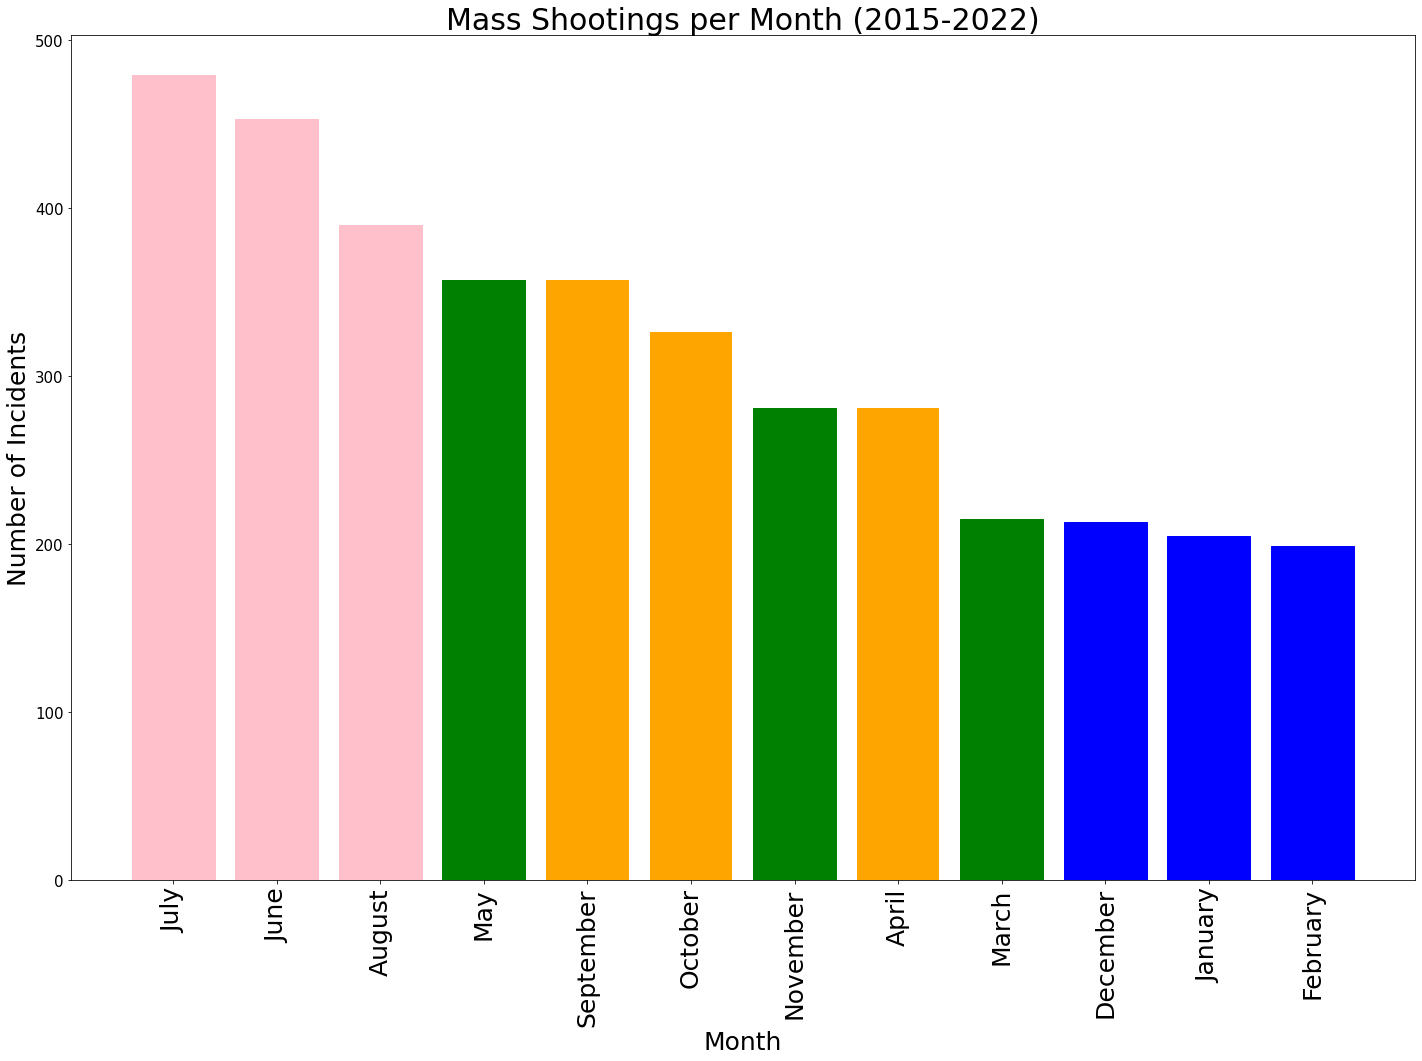

In [67]:
# Calculate the total number of mass shootings per season/month
#bar_chart_per_month = per_month_df.plot(kind="bar", color="orange", figsize =(10,8))
#bar_chart_per_month.set_title("Mass Shootings Per Month (2015-2022)", fontsize = 20)
#bar_chart_per_month.set_xlabel("Month", fontsize = 15)
#bar_chart_per_month.set_ylabel("Number of Incidents", fontsize = 15)
#plt.xticks(rotation="vertical", fontsize=15) 

fig, ax = plt.subplots(figsize=(20,15))

x_axis = per_month.index.values
y_axis = per_month.values
bar_chart_per_month = ax.bar(x_axis, y_axis, color='orange', align="center", width = 0.8)
plt.xlabel("Month", fontsize = 25)
plt.ylabel("Number of Incidents", fontsize = 25)
plt.title("Mass Shootings per Month (2015-2022)", fontsize = 30)
plt.xticks(rotation="vertical", fontsize = 25)

bar_chart_per_month[0].set_color('pink')
bar_chart_per_month[1].set_color('pink')
bar_chart_per_month[2].set_color('pink')
bar_chart_per_month[3].set_color('green')
bar_chart_per_month[6].set_color('green')
bar_chart_per_month[8].set_color('green')
bar_chart_per_month[9].set_color('blue')
bar_chart_per_month[10].set_color('blue')
bar_chart_per_month[11].set_color('blue')

plt.savefig("output_data/total_per_month.png")

bar_chart_per_month

In [13]:
# Calculate the total number of mass shootings per city 
per_city = mass_shoot_df["City Or County"].value_counts()
per_city_df = pd.DataFrame(per_city)
per_city_df = per_city_df.loc[(per_city_df["City Or County"] > 50)]
per_city_df

,City Or County
Chicago,289
Philadelphia,128
Baltimore,82
Houston,72
New Orleans,61
Washington,59
Saint Louis,59
Detroit,56
Memphis,52
Brooklyn,51


In [14]:
# Create a pie chart illustrating 10 cities with the most incidents 

 # Labels for the sections of our pie chart
labels = ["Chicago", "Philadelphia", "Baltimore", "Houston", "New Orleans",
          "Saint Louis", "Washington", "Detroit", "Memphis", "Brooklyn"]

# The values of each section of the pie chart
sizes = [289, 128, 82, 72, 61, 59, 59, 56, 52, 51]

# The colors of each section of the pie chart
colors = ["red", "orange", "lightcoral", "lightskyblue", "yellow", "green", "crimson", "cyan", "palegreen", "navy"]

explode = (0.2, 0, 0, 0, 0, 0, 0, 0, 0, 0)

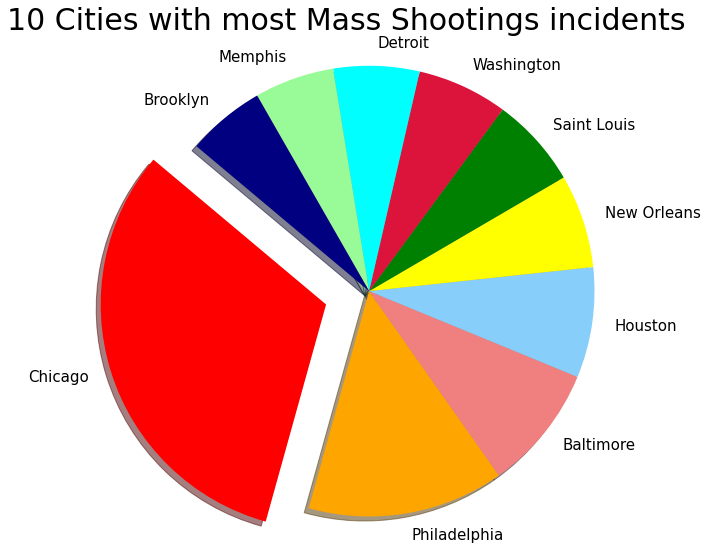

In [68]:
# Create the pie chart based upon the values above
# Automatically finds the percentages of each part of the pie chart
fig, ax = plt.subplots(figsize=(10,8))

plt.title("10 Cities with most Mass Shootings incidents", fontsize = 30)
plt.pie(sizes, explode=explode, labels=labels, colors=colors, shadow=True, startangle=140)
plt.axis("equal")
plt.rcParams.update({'font.size':15})
plt.rcParams["figure.figsize"] = [7.50, 3.50]
plt.rcParams["figure.autolayout"] = True

fig.subplots_adjust(top=1.8)
plt.savefig("output_data/cities.png")

# **Census Data vs. Mass Shootings Data (Nancy)**

In [16]:
# rename column so it can be merged
mass_shoot_df = mass_shoot_df.rename(columns={"City Or County": "city"})

# read citys and county df then reduce 
uscities_df = pd.read_csv("Resources/uscities.csv")
reduced_city_county = uscities_df[["city", "county_name"]]

reduced_city_county.head()

,city,county_name
0,New York,New York
1,Los Angeles,Los Angeles
2,Chicago,Cook
3,Miami,Miami-Dade
4,Dallas,Dallas


In [17]:
# Merge the county and mass shoot data frames on the city column
merged_county_and_shootings_df = pd.merge(mass_shoot_df, reduced_city_county, on='city')

# Rename the county_name column
merged_county_and_shootings_df.rename(columns={'county_name': 'County Name'}, inplace=True)

# Drop duplicates
merged_county_and_shootings_df = merged_county_and_shootings_df.drop_duplicates(subset='Incident ID')

# add county to county name so it can merge later on with census
def add_county(row):
    return row['County Name'] + " County"

merged_county_and_shootings_df['County Name'] = merged_county_and_shootings_df.apply(add_county, axis=1)

# Show the merged data frame
merged_county_and_shootings_df

,Incident ID,Incident Date,State,city,Address,# Killed,# Injured,Year,Month,County Name
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015,December,Orleans County
1,451495,22-Nov-15,Louisiana,New Orleans,1900 block of Gallier St,0,17,2015,November,Orleans County
2,432711,18-Oct-15,Louisiana,New Orleans,2600 block of Caffin Avenue,0,4,2015,October,Orleans County
3,402108,25-Aug-15,Louisiana,New Orleans,Fern Street and Olive Street,1,3,2015,August,Orleans County
4,382170,26-Jul-15,Louisiana,New Orleans,Piety and Treasure street,0,4,2015,July,Orleans County
...,...,...,...,...,...,...,...,...,...,...
17893,2225493,2-Feb-22,California,Oroville,410 Oro Dam Blvd E,1,4,2022,February,Butte County
17895,2222953,30-Jan-22,Florida,Winter Haven,Buckeye Loop Rd and MLK Blvd NE,1,4,2022,January,Polk County
17896,2212018,15-Jan-22,Georgia,Brunswick,2717 Glynn Ave,1,5,2022,January,Glynn County
17902,2211746,14-Jan-22,Oregon,Eugene,219 W 8th Ave,0,6,2022,January,Lane County


In [18]:
# get poverty county from census
years = [2015, 2020]

for year in years:
    census_counties = Census(
        api_key,
        year = year
    )

    census_counties_data = census_counties.acs5.get(
        (
            "NAME",
            "B01003_001E", 
            "B19013_001E",
            "B19301_001E",
            "B17001_003E"
        ),
        {'for': 'county:*'}
    )

    # Convert to DataFrame
    census_pd = pd.DataFrame(census_counties_data)
    census_pd['Year'] = year
    
    # Append to a final data frame
    if year == years[0]:
        census_df = census_pd
    else:
        census_df = census_df.append(census_pd)

census_df

,NAME,B01003_001E,B19013_001E,B19301_001E,B17001_003E,state,county,Year
0,"Childress County, Texas",7059.0,36633.0,19861.0,573.0,48,075,2015
1,"Comal County, Texas",119632.0,65833.0,32838.0,4122.0,48,091,2015
2,"Houston County, Texas",22949.0,32698.0,17570.0,1850.0,48,225,2015
3,"Navarro County, Texas",48118.0,41505.0,20697.0,4323.0,48,349,2015
4,"Scurry County, Texas",17238.0,56842.0,24584.0,555.0,48,415,2015
...,...,...,...,...,...,...,...,...
3216,"Renville County, Minnesota",14572.0,58542.0,31243.0,597.0,27,129,2020
3217,"Roseau County, Minnesota",15259.0,62304.0,31452.0,524.0,27,135,2020
3218,"Sherburne County, Minnesota",96015.0,88671.0,36022.0,2030.0,27,141,2020
3219,"Steele County, Minnesota",36710.0,68172.0,34648.0,1349.0,27,147,2020


In [19]:
# Rename columns
poverty_census_df = census_df.rename(columns={
    "NAME": "County Name",
    "B01003_001E": "Population",
    "B19013_001E": "Household Income",
    "B19301_001E": "Per Capita Income",
    "B17001_003E": "Number Below Poverty",
    "state": "State"
})
# calculate and add a new column for poverty rate then make it percentage
poverty_census_df['Poverty Rate'] = poverty_census_df['Number Below Poverty'] / poverty_census_df['Population']

poverty_census_df['Poverty Rate']= (poverty_census_df['Poverty Rate']*100)
poverty_census_df['Poverty Rate'] = poverty_census_df['Poverty Rate'].round(0)

poverty_census_df.head()

,County Name,Population,Household Income,Per Capita Income,Number Below Poverty,State,county,Year,Poverty Rate
0,"Childress County, Texas",7059.0,36633.0,19861.0,573.0,48,075,2015,8.0
1,"Comal County, Texas",119632.0,65833.0,32838.0,4122.0,48,091,2015,3.0
2,"Houston County, Texas",22949.0,32698.0,17570.0,1850.0,48,225,2015,8.0
3,"Navarro County, Texas",48118.0,41505.0,20697.0,4323.0,48,349,2015,9.0
4,"Scurry County, Texas",17238.0,56842.0,24584.0,555.0,48,415,2015,3.0


In [20]:
# Extract Poverty Rate 
county_poverty_df = poverty_census_df[["County Name", "Poverty Rate", "Year"]]

# make copy
county_poverty_df2 = county_poverty_df.copy()
county_poverty_df2

,County Name,Poverty Rate,Year
0,"Childress County, Texas",8.0,2015
1,"Comal County, Texas",3.0,2015
2,"Houston County, Texas",8.0,2015
3,"Navarro County, Texas",9.0,2015
4,"Scurry County, Texas",3.0,2015
...,...,...,...
3216,"Renville County, Minnesota",4.0,2020
3217,"Roseau County, Minnesota",3.0,2020
3218,"Sherburne County, Minnesota",2.0,2020
3219,"Steele County, Minnesota",4.0,2020


In [21]:
# clean county name in county_poverty_df
county_poverty_df2.loc[:, 'County Name'] = county_poverty_df2['County Name'].str.split(',').str[0]
county_poverty_df2

# merge poverty count to mass shoot df
merged_poverty_and_shootings_df = pd.merge(merged_county_and_shootings_df, county_poverty_df2, on=['County Name','Year'], how='left')
merged_poverty_and_shootings_df = merged_poverty_and_shootings_df.drop_duplicates(subset='Incident ID')
merged_poverty_and_shootings_df

,Incident ID,Incident Date,State,city,Address,# Killed,# Injured,Year,Month,County Name,Poverty Rate
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015,December,Orleans County,7.0
2,451495,22-Nov-15,Louisiana,New Orleans,1900 block of Gallier St,0,17,2015,November,Orleans County,7.0
4,432711,18-Oct-15,Louisiana,New Orleans,2600 block of Caffin Avenue,0,4,2015,October,Orleans County,7.0
6,402108,25-Aug-15,Louisiana,New Orleans,Fern Street and Olive Street,1,3,2015,August,Orleans County,7.0
8,382170,26-Jul-15,Louisiana,New Orleans,Piety and Treasure street,0,4,2015,July,Orleans County,7.0
...,...,...,...,...,...,...,...,...,...,...,...
6396,2225493,2-Feb-22,California,Oroville,410 Oro Dam Blvd E,1,4,2022,February,Butte County,NaN
6397,2222953,30-Jan-22,Florida,Winter Haven,Buckeye Loop Rd and MLK Blvd NE,1,4,2022,January,Polk County,NaN
6398,2212018,15-Jan-22,Georgia,Brunswick,2717 Glynn Ave,1,5,2022,January,Glynn County,NaN
6399,2211746,14-Jan-22,Oregon,Eugene,219 W 8th Ave,0,6,2022,January,Lane County,NaN


In [22]:
# drop rows with NaN
merged_poverty_and_shootings_df = merged_poverty_and_shootings_df.dropna()
merged_poverty_and_shootings_df

,Incident ID,Incident Date,State,city,Address,# Killed,# Injured,Year,Month,County Name,Poverty Rate
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015,December,Orleans County,7.0
2,451495,22-Nov-15,Louisiana,New Orleans,1900 block of Gallier St,0,17,2015,November,Orleans County,7.0
4,432711,18-Oct-15,Louisiana,New Orleans,2600 block of Caffin Avenue,0,4,2015,October,Orleans County,7.0
6,402108,25-Aug-15,Louisiana,New Orleans,Fern Street and Olive Street,1,3,2015,August,Orleans County,7.0
8,382170,26-Jul-15,Louisiana,New Orleans,Piety and Treasure street,0,4,2015,July,Orleans County,7.0
...,...,...,...,...,...,...,...,...,...,...,...
6163,1605752,26-Jan-20,South Carolina,Hartsville,115 W Camden Ave,3,3,2020,January,Darlington County,8.0
6164,1606476,24-Jan-20,North Carolina,Vanceboro,107 Kinshaw Ct,5,0,2020,January,Craven County,6.0
6165,1600350,18-Jan-20,Texas,South Houston,700 block of Virginia St,2,2,2020,January,Harris County,2.0
6167,1599331,17-Jan-20,Utah,Grantsville,93 Eastmoor Dr,4,1,2020,January,Tooele County,3.0


In [23]:
# Split the data frame into two data frames by year
mass_shooting_2015 = merged_poverty_and_shootings_df[merged_poverty_and_shootings_df['Year'] == 2015]
mass_shooting_2020 = merged_poverty_and_shootings_df[merged_poverty_and_shootings_df['Year'] == 2020]
mass_shooting_2015

,Incident ID,Incident Date,State,city,Address,# Killed,# Injured,Year,Month,County Name,Poverty Rate
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015,December,Orleans County,7.0
2,451495,22-Nov-15,Louisiana,New Orleans,1900 block of Gallier St,0,17,2015,November,Orleans County,7.0
4,432711,18-Oct-15,Louisiana,New Orleans,2600 block of Caffin Avenue,0,4,2015,October,Orleans County,7.0
6,402108,25-Aug-15,Louisiana,New Orleans,Fern Street and Olive Street,1,3,2015,August,Orleans County,7.0
8,382170,26-Jul-15,Louisiana,New Orleans,Piety and Treasure street,0,4,2015,July,Orleans County,7.0
...,...,...,...,...,...,...,...,...,...,...,...
4679,277480,11-Jan-15,Florida,Lakeland,7665 Chase Road,1,3,2015,January,Polk County,9.0
4705,276766,11-Jan-15,California,San Jose,3840 Monterey Hwy,0,5,2015,January,Santa Clara County,4.0
4712,276536,10-Jan-15,Kansas,Wichita,4859 E Harry Street,2,2,2015,January,Sedgwick County,6.0
4723,276459,9-Jan-15,California,San Francisco,Laguna St and Page St,4,0,2015,January,San Francisco County,6.0


In [24]:
# get number of incidents per county for 2015
num_incidents_2015 = mass_shooting_2015['County Name'].value_counts()

# Group counties and add column of nuumner of incidents per county
grouped_df_2015 = mass_shooting_2015.groupby('County Name').sum()
grouped_df_2015['Poverty Rate'] = mass_shooting_2015.groupby('County Name')['Poverty Rate'].first()
grouped_df_2015['Year'] = mass_shooting_2015.groupby('County Name')['Year'].first()
grouped_df_2015["Incidents Per County"] = num_incidents_2015

grouped_df_2015

,Incident ID,# Killed,# Injured,Year,Poverty Rate,Incidents Per County
County Name,,,,,,
Alameda County,469468,0,4,2015,6.0,1
Allegheny County,2012863,3,17,2015,5.0,5
Allen County,368732,0,9,2015,8.0,1
Baldwin County,357770,1,3,2015,12.0,1
Baltimore County,4198634,9,42,2015,4.0,11
...,...,...,...,...,...,...
Volusia County,1688906,4,13,2015,8.0,4
Warrick County,451305,0,5,2015,4.0,1
Washington County,1097803,6,7,2015,10.0,3


In [25]:
# get number of incidents per county for 2020
num_incidents_2020 = mass_shooting_2020['County Name'].value_counts()

# Group counties and add column of nuumner of incidents per county
grouped_df_2020 = mass_shooting_2020.groupby('County Name').sum()
grouped_df_2020['Poverty Rate'] = mass_shooting_2020.groupby('County Name')['Poverty Rate'].first()
grouped_df_2020['Year'] = mass_shooting_2020.groupby('County Name')['Year'].first()
grouped_df_2020["Incidents Per County"] = num_incidents_2020

grouped_df_2020

,Incident ID,# Killed,# Injured,Year,Poverty Rate,Incidents Per County
County Name,,,,,,
Ada County,1885251,5,0,2020,4.0,1
Adams County,8477078,1,22,2020,10.0,5
Aiken County,1863726,1,10,2020,6.0,1
Alachua County,1686369,0,5,2020,9.0,1
Alameda County,7135077,2,14,2020,4.0,4
...,...,...,...,...,...,...
Williamsburg County,3731164,6,8,2020,10.0,2
Wilson County,1793680,0,5,2020,4.0,1
Winnebago County,8745984,5,18,2020,5.0,5


In [26]:
# Define a function to create Linear Regression plots
def create_linear_regression_plot(x, y, title, xlabel, ylabel):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    x_arr = np.array(x)
    line = slope * x_arr + intercept
    plt.plot(x, y, 'o', x, line)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)

    print("the r value is :", r_value)
    plt.show()

the r value is : 0.06407069273460074


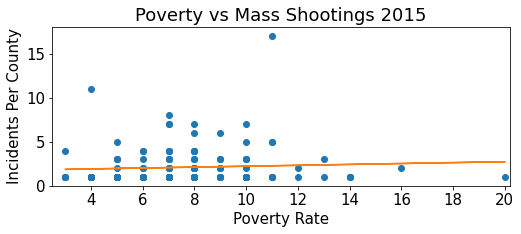

<Figure size 540x252 with 0 Axes>

In [27]:
# Linear regression on Poverty vs Mass shootings 2015
x = grouped_df_2015["Poverty Rate"]
y = grouped_df_2015["Incidents Per County"]
xlabel = "Poverty Rate"
ylabel = "Incidents Per County"
title = "Poverty vs Mass Shootings 2015"


plt.ylim(0,18)
plt.xlim(2.5, 20.2)

create_linear_regression_plot(x, y, title, xlabel, ylabel)
plt.savefig("output_data/2015_scatter_plot.png")
plt.show()

the r value is : -0.02177164141082191


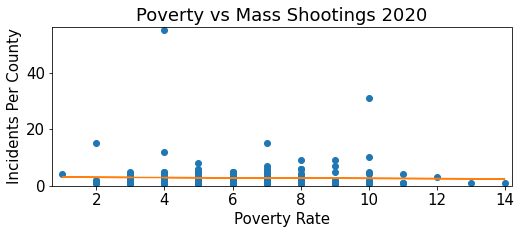

<Figure size 540x252 with 0 Axes>

In [28]:
# Linear regression on Poverty vs Mass shootings 2020
x = grouped_df_2020['Poverty Rate']
y = grouped_df_2020['Incidents Per County']
xlabel = "Poverty Rate"
ylabel = "Incidents Per County"
title ="Poverty vs Mass Shootings 2020"


plt.ylim(0,56)
plt.xlim(.7, 14.2)

create_linear_regression_plot(x, y, title, xlabel, ylabel)
plt.savefig("output_data/2020_scatter_plot.png")
plt.show()

In [29]:
# API Call to get Cencus Data (population) by State (FOR LEAH'S CODE)

c = Census(
    api_key,
    year = 2020
)

census_data = c.acs5.get(
    ("NAME",
     "B01003_001E", 
     "B19013_001E",
     "B19301_001E",
     "B17001_002E"
    ),
    {'for': 'state:*'}
)

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)
census_pd.head()

,NAME,B01003_001E,B19013_001E,B19301_001E,B17001_002E,state
0,Pennsylvania,12794885.0,63627.0,35518.0,1480430.0,42
1,California,39346023.0,78672.0,38576.0,4853434.0,06
2,West Virginia,1807426.0,48037.0,27346.0,300152.0,54
3,Utah,3151239.0,74197.0,30986.0,283360.0,49
4,New York,19514849.0,71117.0,40898.0,2581048.0,36


In [30]:
# Rename columns
census_data_complete = census_pd.rename(columns={
    "NAME": "State",
    "B01003_001E": "Population",
    "B19013_001E": "Household Income",
    "B19301_001E": "Per Capita Income",
    "B17001_002E": "Poverty Count"
})
census_data_complete.head()

,State,Population,Household Income,Per Capita Income,Poverty Count,state
0,Pennsylvania,12794885.0,63627.0,35518.0,1480430.0,42
1,California,39346023.0,78672.0,38576.0,4853434.0,06
2,West Virginia,1807426.0,48037.0,27346.0,300152.0,54
3,Utah,3151239.0,74197.0,30986.0,283360.0,49
4,New York,19514849.0,71117.0,40898.0,2581048.0,36


# **Guns Laws vs. Mass Shootings (Leah)**

In [31]:
# Extract ranking for stricter gun laws
mass_shoot_df.head()

,Incident ID,Incident Date,State,city,Address,# Killed,# Injured,Year,Month
0,476321,31-Dec-15,Louisiana,New Orleans,1900 block of Amelia Street,0,6,2015,December
1,473882,27-Dec-15,Tennessee,Jackson,North Parkway,0,4,2015,December
2,472268,26-Dec-15,Pennsylvania,Philadelphia,4210 Macalester St,0,4,2015,December
3,471867,25-Dec-15,Florida,Jacksonville,Franklin and Odessa,0,4,2015,December
4,471860,25-Dec-15,Alabama,Mobile,785 Schillinger Rd S,0,4,2015,December


In [32]:
data_by_state_sum = pd.DataFrame(mass_shoot_df.groupby(mass_shoot_df["State"]).sum())
data_by_state_sum.head()

,Incident ID,# Killed,# Injured,Year
State,,,,
Alabama,154407565,104,400,205954
Alaska,7378729,6,12,8081
Arizona,69422977,77,181,92881
Arkansas,63830055,37,208,84807
California,458296864,382,1294,660134


In [33]:
data_by_state_count = pd.DataFrame(mass_shoot_df.groupby(mass_shoot_df["State"]).count())
data_by_state_count.head()

,Incident ID,Incident Date,city,Address,# Killed,# Injured,Year,Month
State,,,,,,,,
Alabama,102,102,102,102,102,102,102,102
Alaska,4,4,4,4,4,4,4,4
Arizona,46,46,46,46,46,46,46,46
Arkansas,42,42,42,42,42,42,42,42
California,327,327,327,327,327,327,327,327


In [34]:
data_by_state = pd.merge(data_by_state_count, data_by_state_sum, on="State")
data_by_state_df = data_by_state[["Incident ID_x", "# Killed_y", "# Injured_y"]]
state_data = data_by_state_df.rename(columns={"Incident ID_x": "Incident Count", "# Killed_y": "Total Killed", "# Injured_y": "Total Injured"})
state_data.head()

,Incident Count,Total Killed,Total Injured
State,,,
Alabama,102,104,400
Alaska,4,6,12
Arizona,46,77,181
Arkansas,42,37,208
California,327,382,1294


In [35]:
gun_laws = pd.read_csv("Resources/gun_law_data.csv")
gun_laws.head()

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning
0,California,86.5,1,1,1,1,1,1,blue
1,New York,81.5,2,1,0,1,1,1,blue
2,Hawaii,79.5,3,1,1,1,1,1,blue
3,New Jersey,79.0,4,1,1,1,1,1,blue
4,Connecticut,78.5,5,1,0,1,1,1,blue


In [36]:
combo_df = pd.merge(gun_laws, state_data, on="State", how="outer")
combo_filled = combo_df.fillna(0)
combo_filled.head()

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning,Incident Count,Total Killed,Total Injured
0,California,86.5,1.0,1.0,1.0,1.0,1.0,1.0,blue,327.0,382.0,1294.0
1,New York,81.5,2.0,1.0,0.0,1.0,1.0,1.0,blue,176.0,98.0,769.0
2,Hawaii,79.5,3.0,1.0,1.0,1.0,1.0,1.0,blue,0.0,0.0,0.0
3,New Jersey,79.0,4.0,1.0,1.0,1.0,1.0,1.0,blue,87.0,59.0,371.0
4,Connecticut,78.5,5.0,1.0,0.0,1.0,1.0,1.0,blue,27.0,14.0,119.0


In [37]:
data_by_state_df = pd.merge(combo_filled, census_data_complete, on="State", how="outer")

data_by_state_df.drop(labels=[50, 51], axis=0, inplace=True)

#data_by_state_df = data_by_state_df.dropna()
data_by_state_df.head()
                       

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,state
0,California,86.5,1.0,1.0,1.0,1.0,1.0,1.0,blue,327.0,382.0,1294.0,39346023.0,78672.0,38576.0,4853434.0,06
1,New York,81.5,2.0,1.0,0.0,1.0,1.0,1.0,blue,176.0,98.0,769.0,19514849.0,71117.0,40898.0,2581048.0,36
2,Hawaii,79.5,3.0,1.0,1.0,1.0,1.0,1.0,blue,0.0,0.0,0.0,1420074.0,83173.0,37013.0,127971.0,15
3,New Jersey,79.0,4.0,1.0,1.0,1.0,1.0,1.0,blue,87.0,59.0,371.0,8885418.0,85245.0,44153.0,842704.0,34
4,Connecticut,78.5,5.0,1.0,0.0,1.0,1.0,1.0,blue,27.0,14.0,119.0,3570549.0,79855.0,45668.0,339156.0,09


In [38]:
#state_per_capita = data_by_state_df 

#data_by_state_df = state_per_capita
state_per_capita = data_by_state_df 

incident_per_capita = round((state_per_capita["Incident Count"] / state_per_capita["Population"]) * 1000000, 2)
state_per_capita["Incidents per Million"] = incident_per_capita

deaths_per_capita = round((state_per_capita["Total Killed"] / state_per_capita["Population"]) * 1000000, 2)
state_per_capita["Deaths per Million"] = deaths_per_capita

injured_per_capita = round((state_per_capita["Total Injured"] / state_per_capita["Population"]) * 1000000, 2)
state_per_capita["Injured per Million"] = injured_per_capita
#state_per_capita = state_per_capita.dropna()
state_per_capita.head()

,State,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,state,Incidents per Million,Deaths per Million,Injured per Million
0,California,86.5,1.0,1.0,1.0,1.0,1.0,1.0,blue,327.0,382.0,1294.0,39346023.0,78672.0,38576.0,4853434.0,06,8.31,9.71,32.89
1,New York,81.5,2.0,1.0,0.0,1.0,1.0,1.0,blue,176.0,98.0,769.0,19514849.0,71117.0,40898.0,2581048.0,36,9.02,5.02,39.41
2,Hawaii,79.5,3.0,1.0,1.0,1.0,1.0,1.0,blue,0.0,0.0,0.0,1420074.0,83173.0,37013.0,127971.0,15,0.00,0.00,0.00
3,New Jersey,79.0,4.0,1.0,1.0,1.0,1.0,1.0,blue,87.0,59.0,371.0,8885418.0,85245.0,44153.0,842704.0,34,9.79,6.64,41.75
4,Connecticut,78.5,5.0,1.0,0.0,1.0,1.0,1.0,blue,27.0,14.0,119.0,3570549.0,79855.0,45668.0,339156.0,09,7.56,3.92,33.33


In [39]:
leaning = data_by_state_df.groupby(data_by_state_df["Political Leaning"]).sum()
leaning_df = pd.DataFrame(leaning)

leaning_df

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Political Leaning,,,,,,,,,,,,,,,,,
blue,1097.0,158.0,16.0,6.0,17.0,9.0,14.0,1459.0,1330.0,5978.0,134593803.0,1259757.0,666309.0,15228869.0,163.67,154.88,652.85
purple,231.0,226.0,1.0,0.0,2.0,0.0,0.0,757.0,886.0,3519.0,73079332.0,561483.0,307640.0,9237536.0,73.36,102.59,435.22
red,278.0,891.0,0.0,0.0,4.0,0.0,0.0,1481.0,1739.0,5983.0,118194199.0,1405222.0,750343.0,16340530.0,253.51,297.96,1001.99


In [40]:
leaning_count_per_capita = round((leaning_df["Incident Count"] / leaning_df["Population"]) * 1000000, 2)
leaning_df["Incidents per Million"] = leaning_count_per_capita
leaning_deaths_per_capita = round((leaning_df["Total Killed"] / leaning_df["Population"]) * 1000000, 2)
leaning_df["Deaths per Million"] = leaning_deaths_per_capita
leaning_injured_per_capita = round((leaning_df["Total Injured"] / leaning_df["Population"]) * 1000000, 2)
leaning_df["Injured per Million"] = leaning_injured_per_capita
leaning_df

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Political Leaning,,,,,,,,,,,,,,,,,
blue,1097.0,158.0,16.0,6.0,17.0,9.0,14.0,1459.0,1330.0,5978.0,134593803.0,1259757.0,666309.0,15228869.0,10.84,9.88,44.42
purple,231.0,226.0,1.0,0.0,2.0,0.0,0.0,757.0,886.0,3519.0,73079332.0,561483.0,307640.0,9237536.0,10.36,12.12,48.15
red,278.0,891.0,0.0,0.0,4.0,0.0,0.0,1481.0,1739.0,5983.0,118194199.0,1405222.0,750343.0,16340530.0,12.53,14.71,50.62


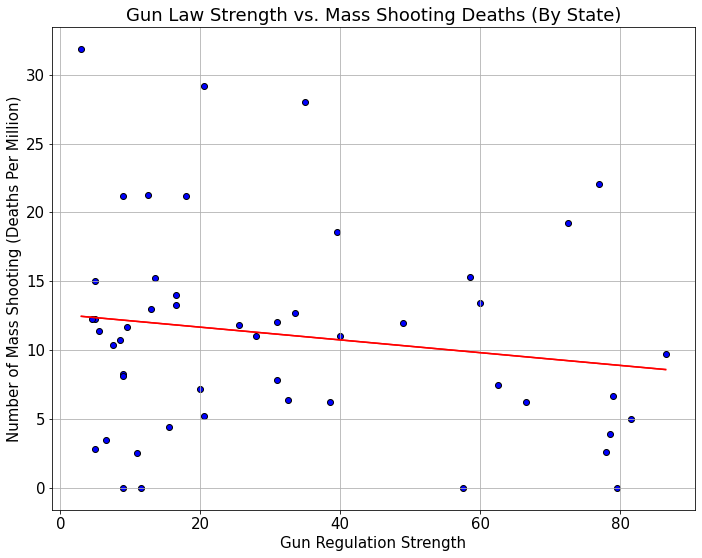

In [63]:
score_x = state_per_capita["ETR Composite Score"]
deaths_y = state_per_capita["Deaths per Million"]

fig, ax = plt.subplots(figsize=(10,8))
fig1 = plt.scatter(score_x, deaths_y, facecolors="blue", edgecolors="black")

plt.title("Gun Law Strength vs. Mass Shooting Deaths (By State)")
plt.xlabel("Gun Regulation Strength")
plt.ylabel("Number of Mass Shooting (Deaths Per Million)")
plt.grid()

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(score_x, deaths_y)
regress_values = score_x * slope + intercept

m = round(slope,2)
b = round(intercept,2)
line_eq = f"y = {m}x + {b}"

plt.plot (score_x, regress_values, "r-")
plt.plot(score_x, intercept + slope*(score_x), 'r', label='fitted line')

plt.savefig("output_data/fig_laws1.png")
plt.show()

<function matplotlib.pyplot.show(*args, **kw)>

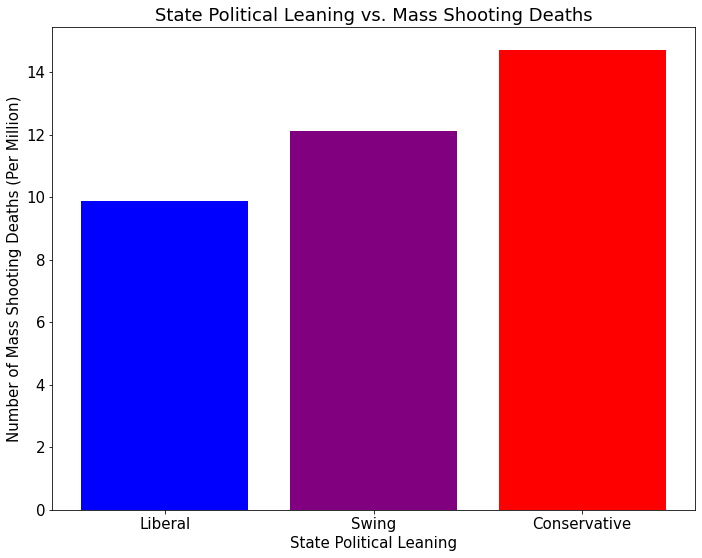

In [42]:
politics_x = ["Liberal", "Swing", "Conservative"]
deaths_per_million_y = leaning_df["Deaths per Million"]

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(politics_x, deaths_per_million_y, color=("blue", "purple", "red"), align="center")

plt.title("State Political Leaning vs. Mass Shooting Deaths")
plt.xlabel("State Political Leaning")
plt.ylabel("Number of Mass Shooting Deaths (Per Million)")

plt.savefig("output_data/fig_laws2.png")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

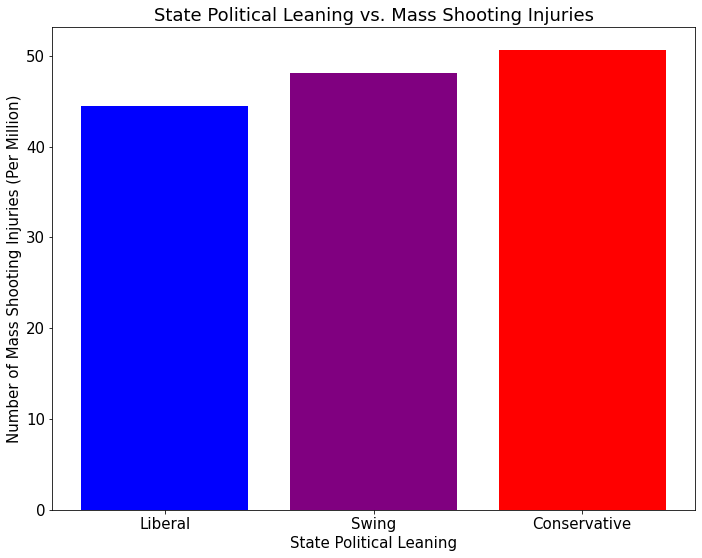

In [43]:
politics_x = ["Liberal", "Swing", "Conservative"]
injured_per_million_y = leaning_df["Injured per Million"]

fig, ax = plt.subplots(figsize=(10,8))
plt.bar(politics_x, injured_per_million_y, color=("blue", "purple", "red"), align="center")

plt.title("State Political Leaning vs. Mass Shooting Injuries")
plt.xlabel("State Political Leaning")
plt.ylabel("Number of Mass Shooting Injuries (Per Million)")

plt.savefig("output_data/fig_laws3.png")
plt.show

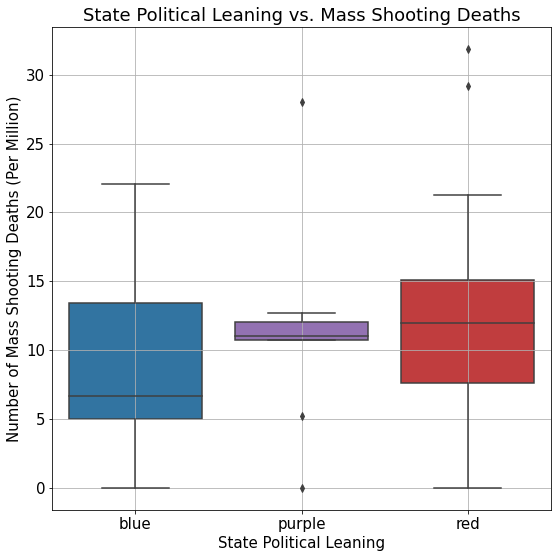

In [44]:
#deaths_box = data_by_state_df.boxplot("Deaths per Million", by="Political Leaning", figsize=(8,6), boxprops=dict(color=['blue', 'purple', 'red']))

palette ={"blue":"tab:blue", "purple":"tab:purple", "red":"tab:red"}
plt.figure(figsize=(8,8))
sns.boxplot(data=data_by_state_df, x="Political Leaning", y="Deaths per Million", palette=palette)

plt.title("State Political Leaning vs. Mass Shooting Deaths")
plt.xlabel("State Political Leaning")
plt.ylabel("Number of Mass Shooting Deaths (Per Million)")
plt.grid()
plt.savefig("output_data/fig_laws5.png")

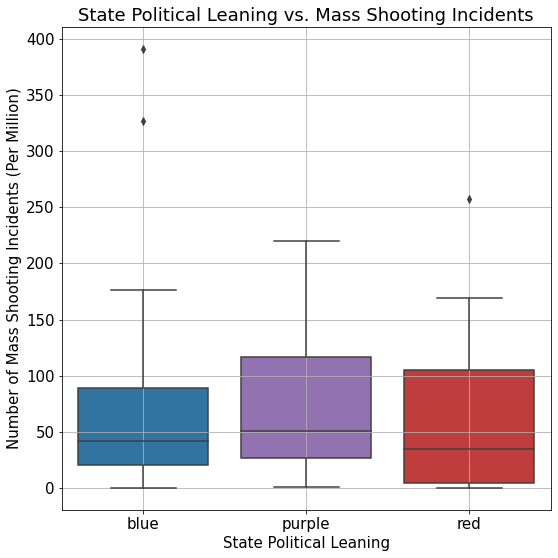

In [45]:
#incident_box = data_by_state_df.boxplot("Incident Count", by="Political Leaning", figsize=(8,6), boxprops=dict(color=['blue', 'purple', 'red']))
palette ={"blue":"tab:blue", "purple":"tab:purple", "red":"tab:red"}
plt.figure(figsize=(8,8))
sns.boxplot(data=data_by_state_df, x="Political Leaning", y="Incident Count", palette=palette)

plt.title("State Political Leaning vs. Mass Shooting Incidents")
plt.xlabel("State Political Leaning")
plt.ylabel("Number of Mass Shooting Incidents (Per Million)")
plt.grid()
plt.savefig("output_data/fig_laws6.png")

In [46]:
blue_group = data_by_state_df[data_by_state_df["Political Leaning"] == "blue"]["Deaths per Million"]
purple_group = data_by_state_df[data_by_state_df["Political Leaning"] == "purple"]["Deaths per Million"]
red_group = data_by_state_df[data_by_state_df["Political Leaning"] == "red"]["Deaths per Million"]
st.f_oneway(blue_group, purple_group, red_group)

F_onewayResult(statistic=0.9730903338152583, pvalue=0.3853963986137584)

In [47]:
blue_group1 = data_by_state_df[data_by_state_df["Political Leaning"] == "blue"]["Incident Count"]
purple_group1 = data_by_state_df[data_by_state_df["Political Leaning"] == "purple"]["Incident Count"]
red_group1 = data_by_state_df[data_by_state_df["Political Leaning"] == "red"]["Incident Count"]
st.f_oneway(blue_group1, purple_group1, red_group1)

F_onewayResult(statistic=0.44970907036507496, pvalue=0.6405294054440709)

In [48]:
background = data_by_state_df.groupby(data_by_state_df["Background Checks"]).sum()
background_incident = round((background["Incident Count"] / background["Population"]) * 1000000, 2)
background["Incidents per Million"] = background_incident
background_deaths = round((background["Total Killed"] / background["Population"]) * 1000000, 2)
background["Deaths per Million"] = background_deaths
background_injured = round((background["Total Injured"] / background["Population"]) * 1000000, 2)
background["Injured per Million"] = background_injured

background

,ETR Composite Score,ETR Rank,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Background Checks,,,,,,,,,,,,,,,,
0.0,512.5,1116.0,0.0,7.0,0.0,0.0,2259.0,2575.0,9161.0,193843416.0,1978044.0,1064235.0,25707556.0,11.65,13.28,47.26
1.0,1093.5,159.0,6.0,16.0,9.0,14.0,1438.0,1380.0,6319.0,132023918.0,1248418.0,660057.0,15099379.0,10.89,10.45,47.86


In [49]:
waiting = data_by_state_df.groupby(data_by_state_df["Waiting Period"]).sum()

waiting_incident = round((waiting["Incident Count"] / waiting["Population"]) * 1000000, 2)
waiting["Incidents per Million"] = waiting_incident
waiting_deaths = round((waiting["Total Killed"] / waiting["Population"]) * 1000000, 2)
waiting["Deaths per Million"] = waiting_deaths
waiting_injured = round((waiting["Total Injured"] / waiting["Population"]) * 1000000, 2)
waiting["Injured per Million"] = waiting_injured
waiting

,ETR Composite Score,ETR Rank,Background Checks,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Waiting Period,,,,,,,,,,,,,,,,
0.0,1154.0,1239.0,11.0,17.0,4.0,8.0,2770.0,3117.0,11679.0,256404233.0,2753576.0,1486388.0,32844818.0,10.80,12.16,45.55
1.0,452.0,36.0,6.0,6.0,5.0,6.0,927.0,838.0,3801.0,69463101.0,472886.0,237904.0,7962117.0,13.35,12.06,54.72


In [50]:
no_stand = data_by_state_df.groupby(data_by_state_df["No Stand Your Ground "]).sum()

no_stand_incident = round((no_stand["Incident Count"] / no_stand["Population"]) * 1000000, 2)
no_stand["Incidents per Million"] = waiting_incident
no_stand_deaths = round((no_stand["Total Killed"] / no_stand["Population"]) * 1000000, 2)
no_stand["Deaths per Million"] = no_stand_deaths
no_stand_injured = round((no_stand["Total Injured"] / no_stand["Population"]) * 1000000, 2)
no_stand["Injured per Million"] = no_stand_injured
no_stand

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,Assualt Weapons Ban,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
No Stand Your Ground,,,,,,,,,,,,,,,,
0.0,400.5,930.0,1.0,0.0,0.0,0.0,1981.0,2350.0,8406.0,166754363.0,1608002.0,860076.0,22525223.0,10.80,14.09,50.41
1.0,1205.5,345.0,16.0,6.0,9.0,14.0,1716.0,1605.0,7074.0,159112971.0,1618460.0,864216.0,18281712.0,13.35,10.09,44.46


In [51]:
weapons_ban = data_by_state_df.groupby(data_by_state_df["Assualt Weapons Ban"]).sum()

weapons_ban_incident = round((weapons_ban["Incident Count"] / weapons_ban["Population"]) * 1000000, 2)
weapons_ban["Incidents per Million"] = weapons_ban_incident
weapons_ban_deaths = round((weapons_ban["Total Killed"] / weapons_ban["Population"]) * 1000000, 2)
weapons_ban["Deaths per Million"] = weapons_ban_deaths
weapons_ban_injured = round((weapons_ban["Total Injured"] / weapons_ban["Population"]) * 1000000, 2)
weapons_ban["Injured per Million"] = weapons_ban_injured
weapons_ban

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,High-Capacity Mag. Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
Assualt Weapons Ban,,,,,,,,,,,,,,,,
0.0,913.5,1228.0,8.0,1.0,14.0,5.0,2521.0,2974.0,10612.0,226535951.0,2519414.0,1355197.0,29281304.0,11.13,13.13,46.84
1.0,692.5,47.0,9.0,5.0,9.0,9.0,1176.0,981.0,4868.0,99331383.0,707048.0,369095.0,11525631.0,11.84,9.88,49.01


In [52]:
high_cap_ban = data_by_state_df.groupby(data_by_state_df["High-Capacity Mag. Ban"]).sum()

high_cap_ban_incident = round((high_cap_ban["Incident Count"] / high_cap_ban["Population"]) * 1000000, 2)
high_cap_ban["Incidents per Million"] = high_cap_ban_incident
high_cap_ban_deaths = round((high_cap_ban["Total Killed"] / high_cap_ban["Population"]) * 1000000, 2)
high_cap_ban["Deaths per Million"] = high_cap_ban_deaths
high_cap_ban_injured = round((high_cap_ban["Total Injured"] / high_cap_ban["Population"]) * 1000000, 2)
high_cap_ban["Injured per Million"] = high_cap_ban_injured
high_cap_ban

,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,Incident Count,Total Killed,Total Injured,Population,Household Income,Per Capita Income,Poverty Count,Incidents per Million,Deaths per Million,Injured per Million
High-Capacity Mag. Ban,,,,,,,,,,,,,,,,
0.0,636.0,1164.0,3.0,0.0,9.0,0.0,2397.0,2801.0,10135.0,207480076.0,2167728.0,1166064.0,27296985.0,11.55,13.50,48.85
1.0,970.0,111.0,14.0,6.0,14.0,9.0,1300.0,1154.0,5345.0,118387258.0,1058734.0,558228.0,13509950.0,10.98,9.75,45.15


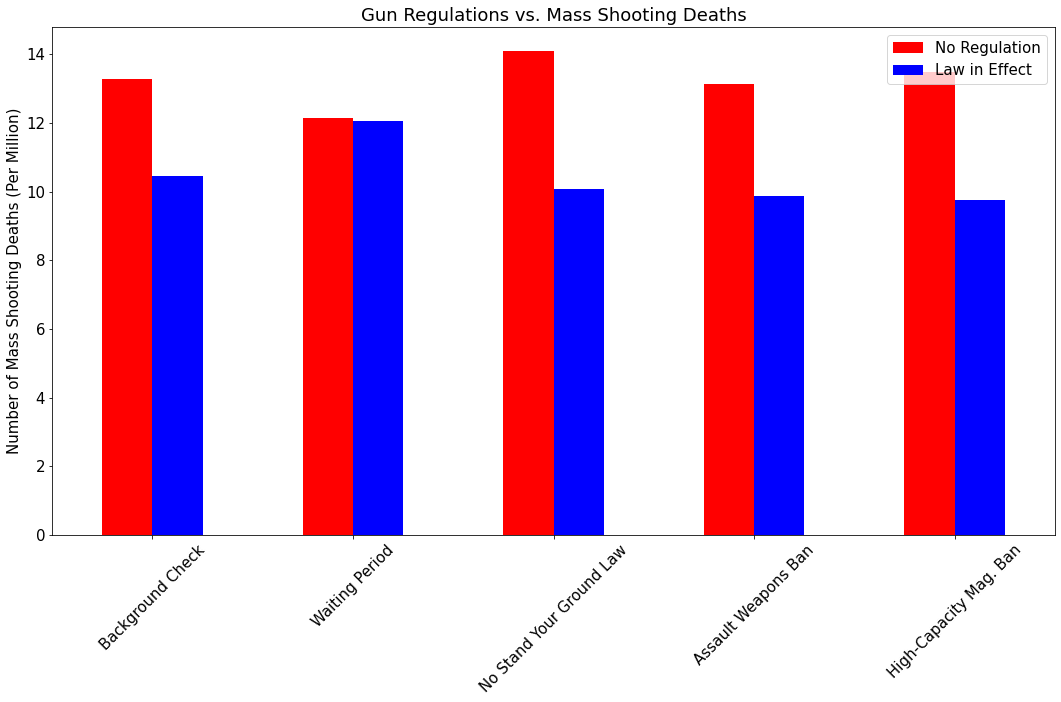

In [53]:
df = pd.DataFrame({"No Regulation":[background.iloc[0,14], waiting.iloc[0,14], no_stand.iloc[0,14], weapons_ban.iloc[0,14], high_cap_ban.iloc[0,14]],
                  "Law in Effect": [background.iloc[1,14], waiting.iloc[1,14], no_stand.iloc[1,14], weapons_ban.iloc[1,14], high_cap_ban.iloc[1,14]]},
                 index = ["Background Check", "Waiting Period", "No Stand Your Ground Law", "Assault Weapons Ban", "High-Capacity Mag. Ban"])

df.plot(kind="bar", color=("red", "blue"), align="center", figsize=(15,10))
plt.xticks(rotation=45)
plt.title("Gun Regulations vs. Mass Shooting Deaths")
plt.ylabel("Number of Mass Shooting Deaths (Per Million)")
plt.savefig("output_data/fig_laws4.png")

In [54]:
background_yes = data_by_state_df [data_by_state_df ["Background Checks"] == 1]["Deaths per Million"]
background_no = data_by_state_df [data_by_state_df ["Background Checks"] == 0]["Deaths per Million"]
st.ttest_ind(background_yes, background_no, equal_var=False)

Ttest_indResult(statistic=-0.4658453210820198, pvalue=0.6447097237766561)

In [55]:
waiting_yes = data_by_state_df[data_by_state_df["Waiting Period"] == 1]["Deaths per Million"]
waiting_no = data_by_state_df[data_by_state_df["Waiting Period"] == 0]["Deaths per Million"]
st.ttest_ind(waiting_yes, waiting_no, equal_var=False)

Ttest_indResult(statistic=-0.4265619940342599, pvalue=0.6849361581512721)

In [56]:
no_stand_yes = data_by_state_df[data_by_state_df["No Stand Your Ground "] == 1]["Deaths per Million"]
no_stand_no = data_by_state_df[data_by_state_df["No Stand Your Ground "] == 0]["Deaths per Million"]
st.ttest_ind(no_stand_yes, no_stand_no, equal_var=False)

Ttest_indResult(statistic=-2.0422341254560092, pvalue=0.04670560646073929)

In [57]:
weapons_yes = data_by_state_df[data_by_state_df["Assualt Weapons Ban"] == 1]["Deaths per Million"]
weapons_no = data_by_state_df[data_by_state_df["Assualt Weapons Ban"] == 0]["Deaths per Million"]
st.ttest_ind(weapons_yes, weapons_no, equal_var=False)

Ttest_indResult(statistic=-0.8393237474861504, pvalue=0.41816498030985616)

In [58]:
high_ban_yes = data_by_state_df[data_by_state_df["High-Capacity Mag. Ban"] == 1]["Deaths per Million"]
high_ban_no = data_by_state_df[data_by_state_df["High-Capacity Mag. Ban"] == 0]["Deaths per Million"]
st.ttest_ind(high_ban_yes, high_ban_no, equal_var=False)

Ttest_indResult(statistic=-1.681965926676953, pvalue=0.10435187606927991)

# Mass Shooting vs. Gun Violence (%) (Isidore)


In [59]:
total_incidents = pd.read_csv("Resources/Total-Incidents.csv", index_col=False)
total_incidents.reset_index(drop=True, inplace=True)
df = pd.DataFrame(total_incidents)
df2 = df.rename({'state.1': 'Total Gun Incidents', 'state': 'State'}, axis='columns')
df2.head()

,State,Total Gun Incidents
0,Alabama,5471
1,Alaska,1349
2,Arizona,2328
3,Arkansas,2842
4,California,16306


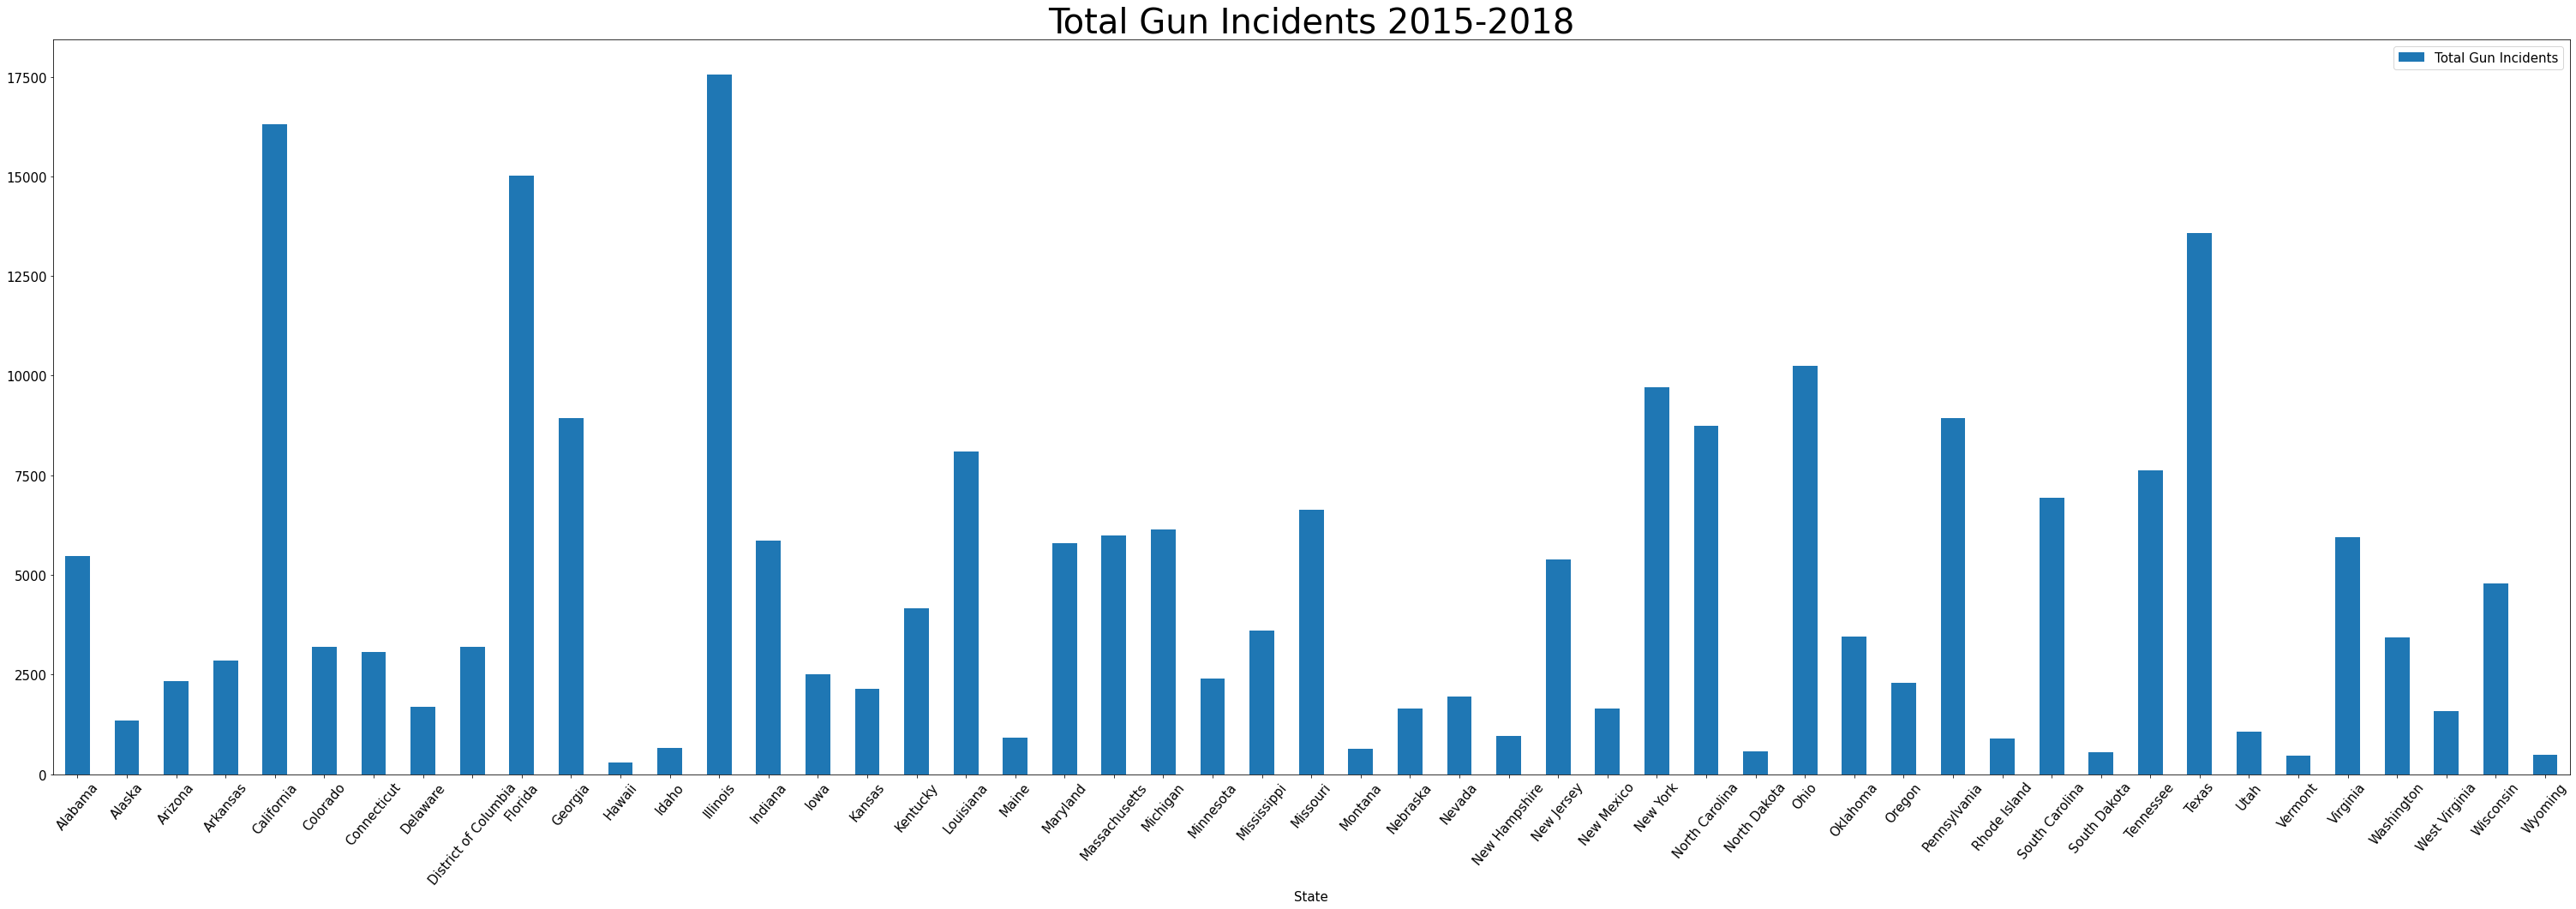

In [60]:
fig2 = df2.plot.bar(x="State", y="Total Gun Incidents", rot=50, figsize=(42,15));
plt.title("Total Gun Incidents 2015-2018", fontsize = 40)
plt.savefig("output_data/total.png")

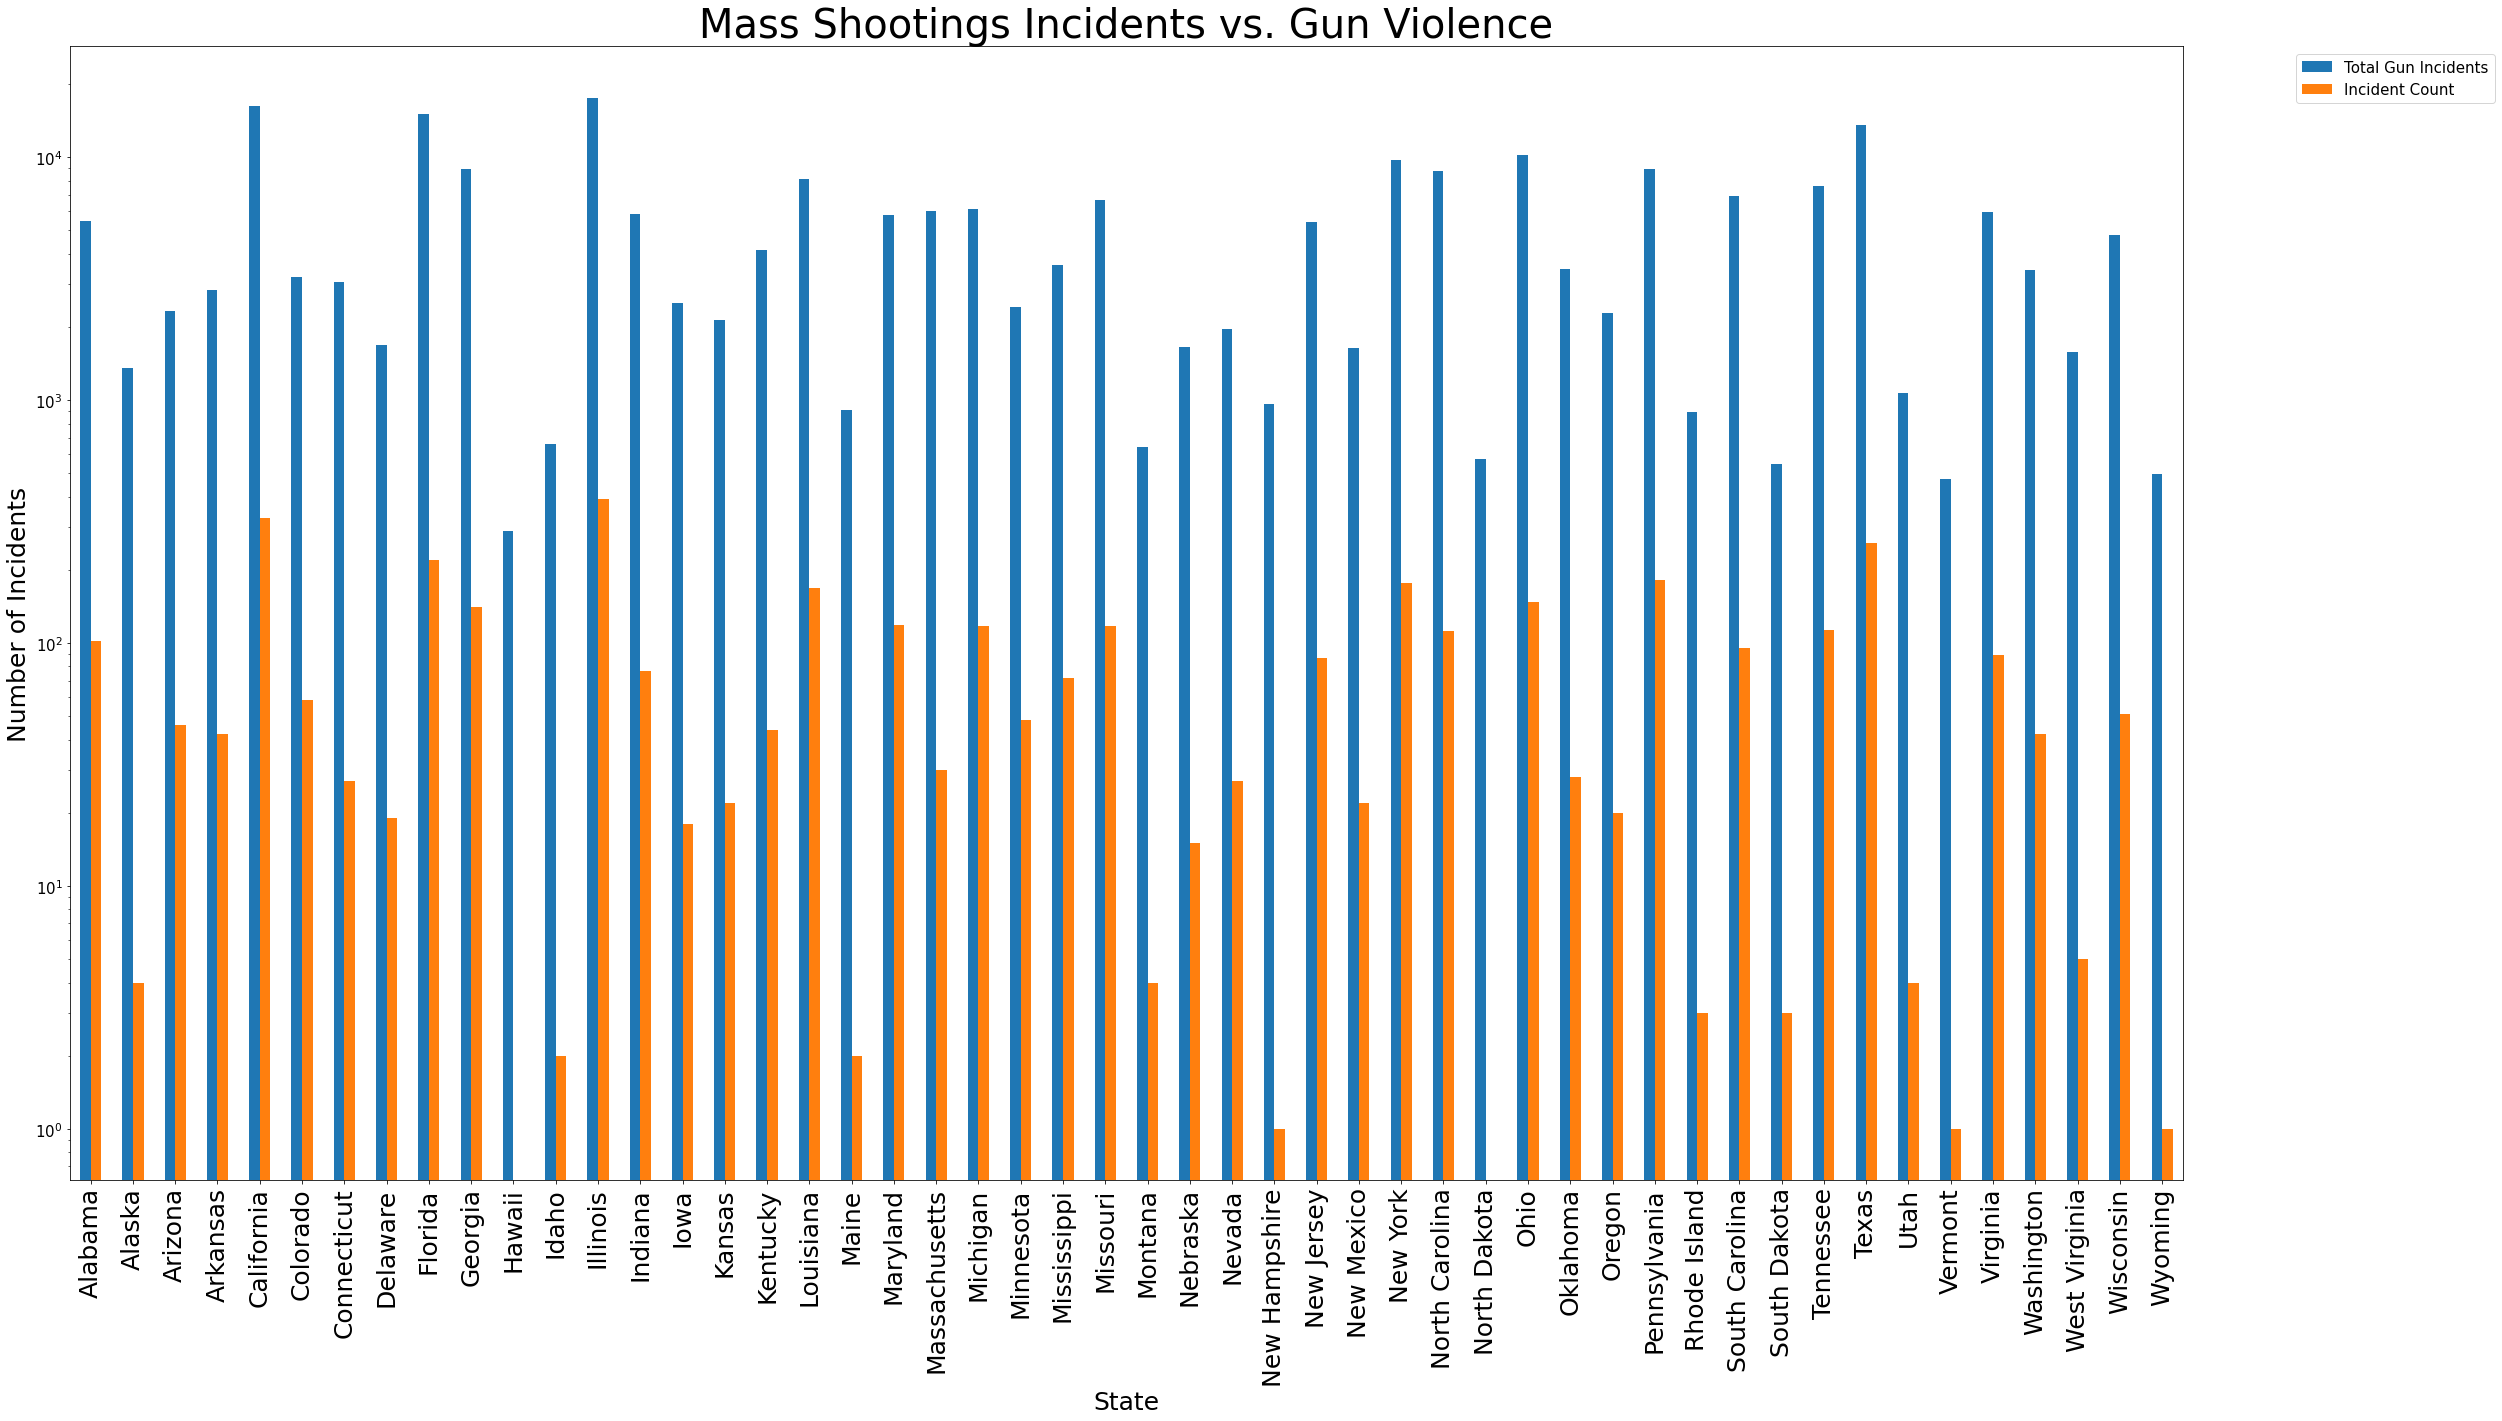

In [61]:
incident_mass_df = pd.merge(df2, data_by_state_df, on="State", how="outer").drop(columns={"Total Killed","Total Injured"}).dropna()
#incident_mass_filtered = df.loc[incident_mass_df['Stat'].isin(["Illionois", "Alabama"])]

incident_mass_df_chart = pd.DataFrame(incident_mass_df, columns = ["State", "Total Gun Incidents", "Incident Count"])

incident_mass_df_chart .plot.bar(x='State', width = 0.5, logy=True, figsize =(35,20))
plt.xticks(rotation=90, fontsize = 25)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title("Mass Shootings Incidents vs. Gun Violence", fontsize = 40)
plt.xlabel("State", fontsize = 25)
plt.ylabel("Number of Incidents", fontsize = 25)

plt.savefig("output_data/gun_violence.png")

In [62]:
incident_mass_df = incident_mass_df.rename({'incidents': 'Total Gun Incidents'}, axis='columns')
incident_mass_df['Percentage'] = ((incident_mass_df['Incident Count'] / incident_mass_df['Total Gun Incidents'] * 100))
incident_mass_df.sort_values(by=['Percentage'], ascending = False)

,State,Total Gun Incidents,ETR Composite Score,ETR Rank,Background Checks,Waiting Period,No Stand Your Ground,Assualt Weapons Ban,High-Capacity Mag. Ban,Political Leaning,Incident Count,Population,Household Income,Per Capita Income,Poverty Count,state,Incidents per Million,Deaths per Million,Injured per Million,Percentage
13,Illinois,17556,77.0,7.0,1.0,1.0,1.0,1.0,1.0,blue,391.0,12716164.0,68428.0,37306.0,1488670.0,17,30.75,22.10,131.80,2.227159
18,Louisiana,8103,20.5,26.0,0.0,0.0,0.0,0.0,0.0,red,169.0,4664616.0,50800.0,29522.0,845230.0,22,36.23,29.16,155.64,2.085647
20,Maryland,5798,72.5,8.0,1.0,1.0,1.0,1.0,1.0,blue,119.0,6037624.0,87063.0,43352.0,531553.0,24,19.71,19.21,73.37,2.052432
38,Pennsylvania,8929,40.0,15.0,0.0,0.0,0.0,0.0,0.0,purple,181.0,12794885.0,63627.0,35518.0,1480430.0,42,14.15,11.02,57.52,2.027103
4,California,16306,86.5,1.0,1.0,1.0,1.0,1.0,1.0,blue,327.0,39346023.0,78672.0,38576.0,4853434.0,06,8.31,9.71,32.89,2.005397
24,Mississippi,3599,3.0,50.0,0.0,0.0,0.0,0.0,0.0,red,72.0,2981835.0,46511.0,25444.0,564439.0,28,24.15,31.86,91.22,2.000556
23,Minnesota,2408,38.5,17.0,0.0,0.0,1.0,0.0,0.0,blue,48.0,5600166.0,73382.0,38881.0,511185.0,27,8.57,6.25,38.21,1.993355
2,Arizona,2328,8.5,42.0,0.0,0.0,0.0,0.0,0.0,purple,46.0,7174064.0,61529.0,32340.0,990528.0,04,6.41,10.73,25.23,1.975945
22,Michigan,6136,25.5,24.0,0.0,0.0,0.0,0.0,0.0,purple,117.0,9973907.0,59234.0,32854.0,1337256.0,26,11.73,11.83,44.62,1.906780
43,Texas,13577,13.5,32.0,0.0,0.0,0.0,0.0,0.0,red,257.0,28635442.0,63826.0,32177.0,3984260.0,48,8.97,15.26,36.28,1.892907
